# Sommaire:

## Introduction -
- Description de la problématique
- Objectifs

#### Ressources -
- Récupération des données
- Analyse exploratoire
- Qualité
- Pré-traitement

#### Attentes et livrables -
- Feature engineering
- Encoding
- Feature selection
- Modélisation

#### Critère d'évaluation -

## Réalisation -
- Analyse exploratoire
 - Qualité
 - Nettoyage
 - Viz
- Feature engineering
 - Encoding
 - Feature selection
- Modélisation

---


# Introduction

Il s’agit de développer une solution de scoring permettant d’apporter une aide à la décision pour les chargés de relation client.

En effet, basée sur des algorithmes de Machine Learning, la solution calcule la probabilité qu’un client rembourse ou non son crédit.

### Ressources

Pour réaliser votre projet, votre manager, vous a fourni le jeu de données suivant qui contient :
- Un historique de prêts
- Un historique d’informations financières
- Des informations sur le comportement des emprunteurs (si l’emprunteur a fait défaut ou pas).

### Attentes et livrables

**Il vous a également communiqué ses attentes par rapport votre projet :**
- Ce premier projet autour de l’IA est un bon moyen pour sensibiliser l’équipe à ce domaine. Un meetup sur ce sujet de l’IA et la Finance sera le bienvenue
- Un premier POC doit être rapidement réalisé en vue de permettre à nos chargés de relation de tester rapidement la solution
- Le modèle doit être interprétable par les équipes qui vont l’utiliser
- Votre travail doit être facilement réutilisable par les futurs data scientists qui vont rejoindre l’équipe
- Votre approche de la modélisation de la problématique ainsi que votre méthode de gestion de ce projet doivent être présentées à l’équipe

**Les livrables attendus :**
- Un Jupyter Notebook avec un premier tuto d’apprentissage (PIMA, Iris, etc.)
- Un Jupyter Notebook présentant les différentes parties de votre travail de modélisation
- Un meetup sur le sujet (option pour la veille)
- Une solution déployée
- Une présentation (PowerPoint)

### Critère d'évaluation

|Compétences|Critère d'évaluation|
|-|-|
|Etudes théorique|4 modèles de classifications sont étudiés|
|Réalisation de feature engineering|Analyse Exploratoire|
|&nbsp;|Au moins 2 approches de feature engineering sont testés dont Boruta|
|&nbsp;|Les hypothèses retenues pour la sélection des variables sont justifiées|
|Entrainement du modèle|Les modèles ML et les métriques d’évaluation sont choisis en fonction de la problématique métier|
|&nbsp;|Au moins 3 modèles ML sont testés|
|&nbsp;|Les hyper-paramètres des modèles sont identifiés et optimisés (GridSearch)|
|&nbsp;|La validation croisé est utilisée|
|&nbsp;|Une analyse comparative des modèles est réalisée|
|Prise en compte des enjeux de l’IA|Des approches d’interprétabilité des modèles ML sont testées|
|&nbsp;|Les résultats du modèle de scoring doivent être présentés à un public non technique (chargés de relation)|
|Déploiement de la solution|La solution développée  est mise à disposition de l’utilisateur final|
|Qualité des livrables|Un Jupyter Notebook présentant l’ensemble de la démarche|
|&nbsp;|Une solution qui répond aux besoins de l’utilisateur final|
|&nbsp;|Un support avec la présentation de la problématique et la solution proposée|

# Réalisation

In [386]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler

In [387]:
# Training data
app_train = pd.read_csv('./notebook/input/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [388]:
# Testing data features
app_test = pd.read_csv('./notebook/input/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Analyse exploratoire des données

## Distribution du "TARGET" dans le train

In [389]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:ylabel='Frequency'>

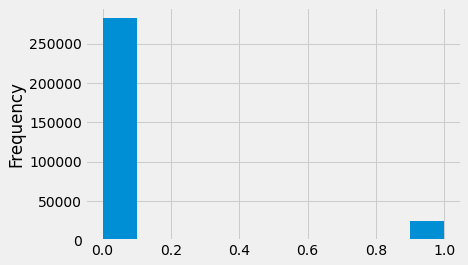

In [390]:
app_train['TARGET'].astype(int).plot.hist()

## Données manquantes

In [391]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Valeurs manquantes', 1: '% de la valeur totale'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% de la valeur totale', ascending=False).round(1)

    # Print some summary information
    print("Votre dataframe possède " + str(df.shape[1]) + " colonnes.\n Il y a " + str(
        mis_val_table_ren_columns.shape[0]) + " colonnes avec des valeurs manquantes.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [392]:
# Missing values statistics
missing_values = missing_values_table(app_train)
print('\nTop 10:')
missing_values.head(10)

Votre dataframe possède 122 colonnes.
 Il y a 67 colonnes avec des valeurs manquantes.

Top 10:


,Valeurs manquantes,% de la valeur totale
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


## Columns type

In [393]:
# Number of each type of column
print('Number of each type of column:')
app_train.dtypes.value_counts()

Number of each type of column:


float64    65
int64      41
object     16
dtype: int64

In [394]:
# Number of unique classes in each object column
print('Number of unique classes in each object column:')
app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

Number of unique classes in each object column:


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [395]:
# Create a label encoder object

le = LabelEncoder()
le_count = 0

In [396]:
# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        # if len(list(app_train[col].unique())) <= 2:
        # Train on the training data
        le.fit(app_train[col])
        # Transform both training and testing data
        app_train[col] = le.transform(app_train[col])
        app_test[col] = le.transform(app_test[col])

        # Keep track of how many columns were label encoded
        le_count += 1

print('%d columns were label encoded.' % le_count)

16 columns were label encoded.


In [397]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 122)
Testing Features shape:  (48744, 121)


### Anomalies

In [398]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [399]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Days Employment')

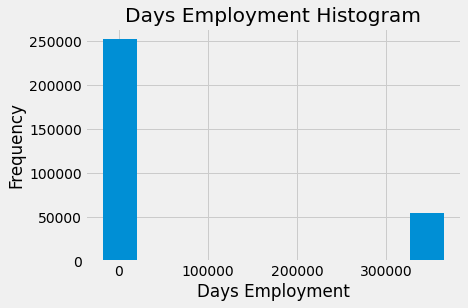

In [400]:
app_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram')
plt.xlabel('Days Employment')

In [401]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Text(0.5, 0, 'Days Employment')

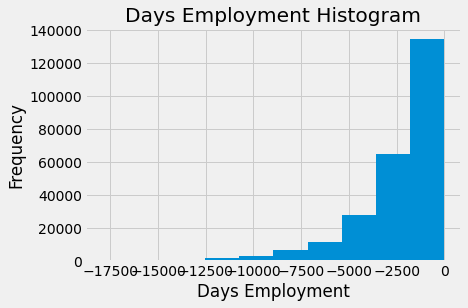

In [402]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

app_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram')
plt.xlabel('Days Employment')

### Correlations

In [403]:
# Find correlations with the target and sort
# correlations = app_train.corr()['TARGET'].sort_values()
#
# # Display correlations
# print('Most Positive Correlations:\n', correlations.tail(15))
# print('\nMost Negative Correlations:\n', correlations.head(15))

In [404]:
# TODO: Fix heatmap

# plt.figure(figsize=(8, 6))
# sns.heatmap(app_train.corr().head(5), app_train.corr()['TARGET'])
# plt.title('SGDClassifier for test set')

### Effect of Age on Repayment

In [405]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982709

Text(0, 0.5, 'Count')

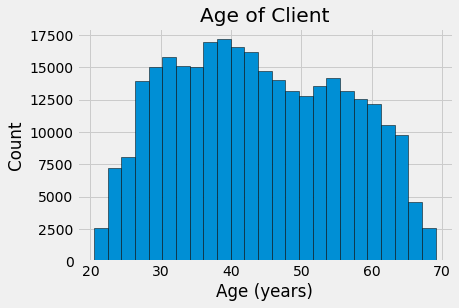

In [406]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor='k', bins=25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

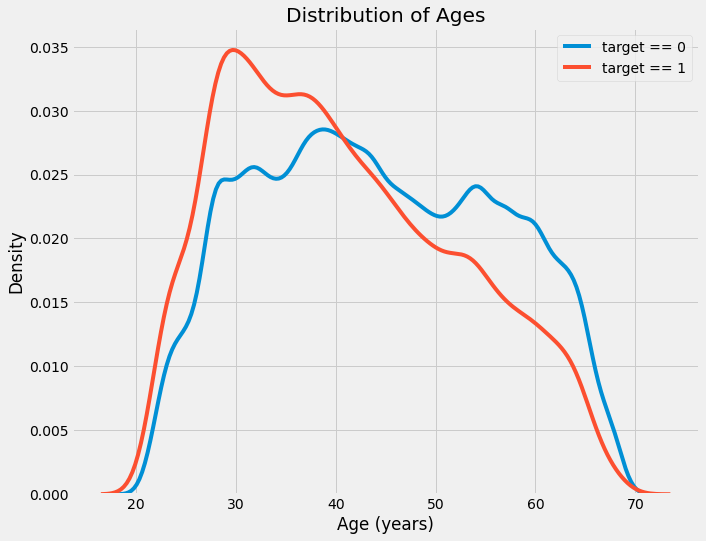

In [407]:
plt.figure(figsize=(10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label='target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label='target == 1')

# Labeling of plot
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.legend()

In [408]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=np.linspace(20, 70, num=11))
age_data.head(10)

C:\Users\33644\AppData\Local\Temp/ipykernel_16916/1897151515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
C:\Users\33644\AppData\Local\Temp/ipykernel_16916/1897151515.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=np.linspace(20, 70, num=11))


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [409]:
# Group by the bin and calculate averages
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'Failure to Repay by Age Group')

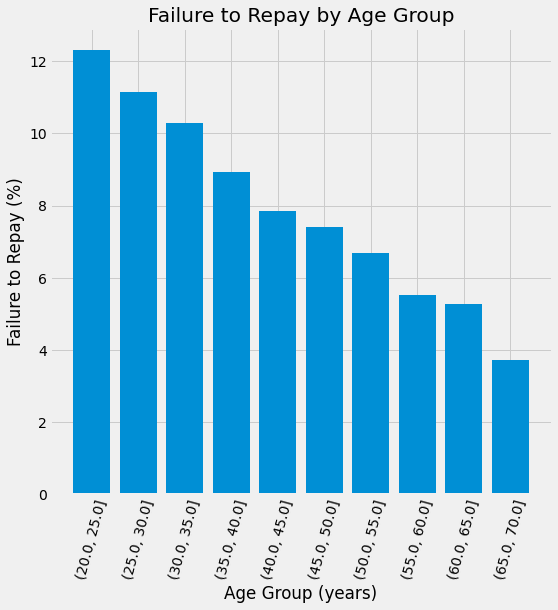

In [410]:
plt.figure(figsize=(8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation=75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

# Feature engineering

In [411]:
y = app_train['TARGET']
X = app_train.drop(columns=['TARGET'])
X.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE              int32
CODE_GENDER                     int32
FLAG_OWN_CAR                    int32
FLAG_OWN_REALTY                 int32
                               ...   
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
DAYS_EMPLOYED_ANOM               bool
Length: 122, dtype: object

In [412]:
# imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent").fit(X)
# imputer = imputer.fit_transform(X)
# X = pd.DataFrame(imputer, columns=X.columns.values.tolist())
X = X.fillna(X.agg(lambda x: pd.Series.mode(x)[0], axis=0))

original dataset shape: (307511,)
Resample dataset shape (49650,)


<AxesSubplot:ylabel='Frequency'>

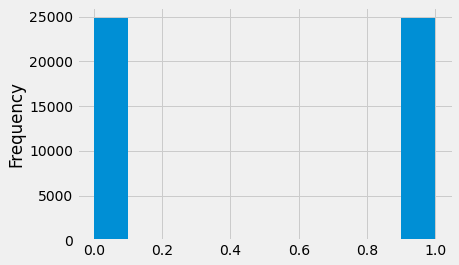

In [413]:
rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', y.shape)
print('Resample dataset shape', y_rus.shape)

y_rus.astype(int).plot.hist()

In [414]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

###initialize Boruta
forest = RandomForestClassifier(
    n_jobs=-1,
    max_depth=5
)
boruta = BorutaPy(
    estimator=forest,
    n_estimators=10,
    max_iter=100  # number of trials to perform
)

boruta.fit(np.array(x_rus), np.array(y_rus))
green_area = X.columns[boruta.support_].to_list()
blue_area = X.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_EMP_PHONE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'TOTALAREA_MODE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'DAYS_EMPLOYED_ANOM']
features in the blue area: ['FLOORSMAX_AVG', 'FLOORSMAX_MEDI']


In [415]:
from sklearn.model_selection import train_test_split

X = x_rus[green_area]
y = y_rus

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

# Model

## Random forest

In [416]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=-1)

# Train on the training data
random_forest.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.7s finished


RandomForestClassifier(n_jobs=-1, random_state=50, verbose=1)

In [417]:
# Make predictions on the test data
predictions = random_forest.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [418]:
from sklearn.metrics import classification_report

base_report = classification_report(y_test, predictions)
print(base_report)

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      6206
           1       0.69      0.66      0.68      6207

    accuracy                           0.68     12413
   macro avg       0.68      0.68      0.68     12413
weighted avg       0.68      0.68      0.68     12413



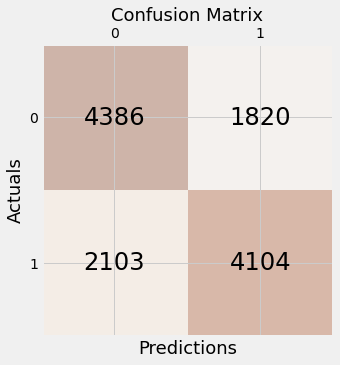

The confusion matrix shows us the number of
True positives : 4386
True negatives : 1820
False positives: 2103
False negatives: 4104


In [419]:
from sklearn import metrics

conf_matrix = metrics.confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('The confusion matrix shows us the number of')
print('True positives :', conf_matrix[0][0])
print('True negatives :', conf_matrix[0][1])
print('False positives:', conf_matrix[1][0])
print('False negatives:', conf_matrix[1][1])

## XGBoost

In [420]:
from xgboost import DMatrix

dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

In [421]:
import xgboost as xgb

param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations
XGBst = xgb.train(param, dtrain, num_round)

[15:48:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:48:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [422]:
predictions = XGBst.predict(dtest)
y_pred = [[np.argmax(line)] for line in predictions]
base_report = classification_report(y_test, y_pred)
print(base_report)

              precision    recall  f1-score   support

           0       0.68      0.69      0.69      6206
           1       0.69      0.67      0.68      6207

    accuracy                           0.68     12413
   macro avg       0.68      0.68      0.68     12413
weighted avg       0.68      0.68      0.68     12413



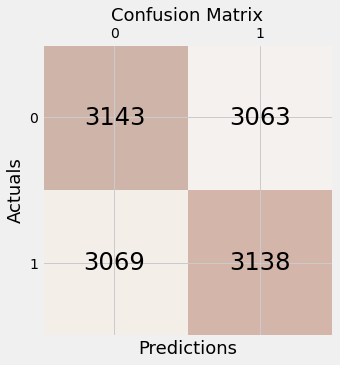

The confusion matrix shows us the number of
True positives : 3143
True negatives : 3063
False positives: 3069
False negatives: 3138


In [426]:
from sklearn import metrics

conf_matrix = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('The confusion matrix shows us the number of')
print('True positives :', conf_matrix[0][0])
print('True negatives :', conf_matrix[0][1])
print('False positives:', conf_matrix[1][0])
print('False negatives:', conf_matrix[1][1])

## Regression logistique

In [427]:
# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C=0.0001)

# Train on the training data
log_reg.fit(X_train, y_train)

C:\Users\33644\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.0001)

In [438]:
# Make predictions
# Make sure to select the second column only
predictions = log_reg.predict(X_test)
base_report = classification_report(y_test, predictions)
print(base_report)

              precision    recall  f1-score   support

           0       0.57      0.65      0.61      6206
           1       0.59      0.50      0.54      6207

    accuracy                           0.58     12413
   macro avg       0.58      0.58      0.57     12413
weighted avg       0.58      0.58      0.57     12413



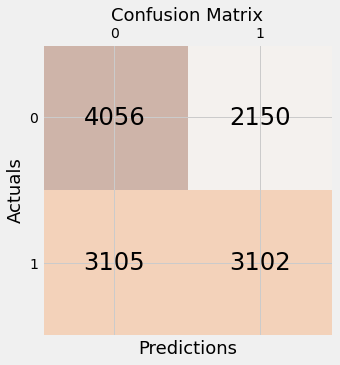

The confusion matrix shows us the number of
True positives : 4056
True negatives : 2150
False positives: 3105
False negatives: 3102


In [445]:
from sklearn import metrics

conf_matrix = metrics.confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('The confusion matrix shows us the number of')
print('True positives :', conf_matrix[0][0])
print('True negatives :', conf_matrix[0][1])
print('False positives:', conf_matrix[1][0])
print('False negatives:', conf_matrix[1][1])

## Decision tree

In [446]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [447]:
predictions = clf.predict(X_test)

base_report = classification_report(y_test, predictions)
print(base_report)

              precision    recall  f1-score   support

           0       0.59      0.60      0.60      6206
           1       0.60      0.58      0.59      6207

    accuracy                           0.59     12413
   macro avg       0.59      0.59      0.59     12413
weighted avg       0.59      0.59      0.59     12413



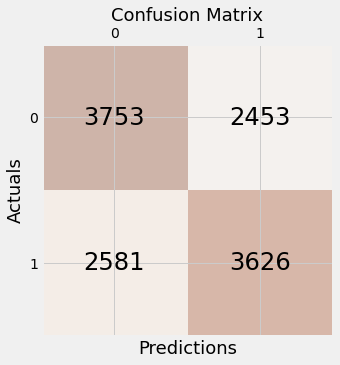

The confusion matrix shows us the number of
True positives : 3753
True negatives : 2453
False positives: 2581
False negatives: 3626


In [449]:
from sklearn import metrics

conf_matrix = metrics.confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('The confusion matrix shows us the number of')
print('True positives :', conf_matrix[0][0])
print('True negatives :', conf_matrix[0][1])
print('False positives:', conf_matrix[1][0])
print('False negatives:', conf_matrix[1][1])

## Grid search

In [451]:
from sklearn.model_selection import GridSearchCV

# Define Parameters
max_depth = [2, 8, 16]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the grid search
random_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5)
grid_results = grid.fit(X_train, y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

Best: [0.65942475 0.65982769 0.66076761 0.67416818 0.67502761 0.67510815
 0.67849176 0.68431939 0.68407773], using {'max_depth': 16, 'n_estimators': 128}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.946123,0.124928,0.050990,0.009411,2,64,"{'max_depth': 2, 'n_estimators': 64}",0.662191,0.657223,0.659057,0.666711,0.651940,0.659425,0.004934,9
1,1.517814,0.091555,0.071584,0.004642,2,128,"{'max_depth': 2, 'n_estimators': 128}",0.659103,0.656686,0.654089,0.668189,0.661072,0.659828,0.004791,8
2,2.883862,0.122991,0.124736,0.004592,2,256,"{'max_depth': 2, 'n_estimators': 256}",0.656149,0.662057,0.659863,0.670740,0.655029,0.660768,0.005589,7
3,2.214674,0.021443,0.063609,0.000796,8,64,"{'max_depth': 8, 'n_estimators': 64}",0.671455,0.676289,0.671277,0.680543,0.671277,0.674168,0.003720,6
4,4.371362,0.075754,0.110020,0.003155,8,128,"{'max_depth': 8, 'n_estimators': 128}",0.671321,0.675483,0.674903,0.680274,0.673157,0.675028,0.002999,5
5,8.563943,0.056077,0.202704,0.004087,8,256,"{'max_depth': 8, 'n_estimators': 256}",0.672261,0.675886,0.673828,0.680408,0.673157,0.675108,0.002907,4
6,3.777368,0.023009,0.106109,0.001316,16,64,"{'max_depth': 16, 'n_estimators': 64}",0.675349,0.683942,0.668054,0.690077,0.675037,0.678492,0.007677,3
7,7.525023,0.071679,0.195084,0.003010,16,128,"{'max_depth': 16, 'n_estimators': 128}",0.681391,0.686224,0.679603,0.691419,0.682960,0.684319,0.004164,1
8,15.474578,0.351711,0.378782,0.011272,16,256,"{'max_depth': 16, 'n_estimators': 256}",0.679108,0.686493,0.675305,0.692628,0.686854,0.684078,0.006137,2


Best: [0.65719574 0.66098231 0.66135831 0.67398024 0.67422197 0.67473215
 0.67927067 0.68504439 0.68378212], using {'max_depth': 16, 'n_estimators': 128}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.764390,0.016308,0.049402,0.004272,2,64,"{'max_depth': 2, 'n_estimators': 64}",0.656015,0.660714,0.657446,0.658117,0.653686,0.657196,0.002324,9
1,1.534237,0.035768,0.077199,0.005267,2,128,"{'max_depth': 2, 'n_estimators': 128}",0.659506,0.664071,0.655835,0.670068,0.655432,0.660982,0.005506,8
2,2.888136,0.068112,0.133996,0.009537,2,256,"{'max_depth': 2, 'n_estimators': 256}",0.659506,0.663937,0.659997,0.670203,0.653149,0.661358,0.005613,7
3,2.235162,0.029769,0.068208,0.001463,8,64,"{'max_depth': 8, 'n_estimators': 64}",0.671321,0.674409,0.672351,0.678260,0.673560,0.673980,0.002383,6
4,4.366755,0.022713,0.112901,0.001746,8,128,"{'max_depth': 8, 'n_estimators': 128}",0.670247,0.674544,0.673694,0.680140,0.672486,0.674222,0.003293,5
5,8.769133,0.175962,0.218788,0.013706,8,256,"{'max_depth': 8, 'n_estimators': 256}",0.671724,0.676557,0.671143,0.681885,0.672351,0.674732,0.004052,4
6,3.892447,0.097154,0.112189,0.008026,16,64,"{'max_depth': 16, 'n_estimators': 64}",0.678706,0.677900,0.676380,0.688062,0.675305,0.679271,0.004551,3
7,7.933313,0.410338,0.207849,0.015291,16,128,"{'max_depth': 16, 'n_estimators': 128}",0.681525,0.690521,0.679200,0.693299,0.680677,0.685044,0.005723,1
8,16.567546,0.991347,0.421019,0.039958,16,256,"{'max_depth': 16, 'n_estimators': 256}",0.683539,0.689313,0.677320,0.686585,0.682154,0.683782,0.004072,2


In [452]:
random_forest = RandomForestClassifier(n_estimators=16, max_depth=128)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [457]:
grid_report = classification_report(y_test, y_pred)
print(grid_report)

              precision    recall  f1-score   support

           0       0.65      0.72      0.68      6206
           1       0.69      0.61      0.65      6207

    accuracy                           0.67     12413
   macro avg       0.67      0.67      0.67     12413
weighted avg       0.67      0.67      0.67     12413



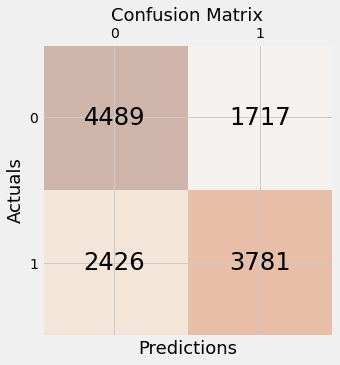

The confusion matrix shows us the number of
True positives : 4489
True negatives : 1717
False positives: 2426
False negatives: 3781


In [455]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('The confusion matrix shows us the number of')
print('True positives :', conf_matrix[0][0])
print('True negatives :', conf_matrix[0][1])
print('False positives:', conf_matrix[1][0])
print('False negatives:', conf_matrix[1][1])
